In [1]:
import numpy as np
from PIL import Image
import os
import string
from pickle import dump
from pickle import load
from keras.applications.xception import Xception #to get pre-trained model Xception
from keras.applications.xception import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.text import Tokenizer #for text tokenization
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import add
from keras.models import Model, load_model
from keras.layers import Input, Dense #Keras to build our CNN and LSTM
from keras.layers import LSTM, Embedding, Dropout
from tqdm import tqdm_notebook as tqdm #to check loop progress
tqdm().pandas()
import PIL.Image

C:\Users\KRIDAY PARMAR\AppData\Local\Temp\ipykernel_27288\1123008542.py:19: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  tqdm().pandas()


0it [00:00, ?it/s]

In [2]:
# Load the document file into memory
def load_doc(filename):
  # Open file to read
    file = open(filename, 'r',encoding="utf8")
    text = file.read()
    file.close()
    return text

In [3]:
# get all images with their captions
def img_capt(filename):
    file = load_doc(filename)
    captions = file.splitlines()
    descriptions ={}
    for caption in captions[:-1]:
        img, caption = caption.split(',',1)
        if img not in descriptions:
            descriptions[img] = [ caption ]
        else:
            descriptions[img].append(caption)
    return descriptions

In [4]:
#Data cleaning function will convert all upper case alphabets to lowercase, removing punctuations and words containing numbers
def txt_clean(captions):
    table = str.maketrans('','',string.punctuation)
    for img,caps in captions.items():
        for i,img_caption in enumerate(caps):
            img_caption.replace("-"," ")
            descp = img_caption.split()
          #uppercase to lowercase
            descp = [wrd.lower() for wrd in descp]
          #remove punctuation from each token
            descp = [wrd.translate(table) for wrd in descp]
          #remove hanging 's and a
            descp = [wrd for wrd in descp if(len(wrd)>1)]
          #remove words containing numbers with them
            descp = [wrd for wrd in descp if(wrd.isalpha())]
          #converting back to string
            img_caption = ' '.join(descp)
            captions[img][i]= img_caption
    return captions

In [5]:
def txt_vocab(descriptions):
  # To build vocab of all unique words
    vocab = set()
    for key in descriptions.keys():
        [vocab.update(d.split()) for d in descriptions[key]]
    return vocab

In [6]:
#To save all descriptions in one file
def save_descriptions(descriptions, filename):
    lines = list()
    for key, desc_list in descriptions.items():
        for desc in desc_list:
            lines.append(key + "\t" + desc )
    data = "\n".join(lines)
    file = open(filename,"w")
    file.write(data)
    file.close()


In [7]:
dataset_text =r"C:\Users\KRIDAY PARMAR\Flickr" 
dataset_images = r"C:\Users\KRIDAY PARMAR\Flickr\flickr30k_images" # enter the directory address where images are stored
#to prepare our text data
filename = dataset_text + "/" + "flickrcaption.txt"
#loading the file that contains all data
#map them into descriptions dictionary 
descriptions = img_capt(filename)
print("Length of descriptions =" ,len(descriptions))
#cleaning the descriptions
clean_descriptions = txt_clean(descriptions)
#to build vocabulary
vocabulary = txt_vocab(clean_descriptions)
print("Length of vocabulary = ", len(vocabulary))
#saving all descriptions in one file
save_descriptions(clean_descriptions, "descriptions30k1.txt")

Length of descriptions = 31784
Length of vocabulary =  19736


In [8]:
my_list = list(clean_descriptions)
my_list.remove('image')
#print(my_list)
len(my_list)


31783

In [10]:
def extract_features(directory):
        model = Xception( include_top=False, pooling='avg' )
        features = {}
        for pic in tqdm(os.listdir(directory)):
            file = directory + "/" + pic
            image = PIL.Image.open(file)
            image = image.resize((299,299))
            image = np.expand_dims(image, axis=0)
          #image = preprocess_input(image)
            image = image/127.5
            image = image - 1.0
            feature = model.predict(image)
            features[pic] = feature
        return features

In [11]:
features = extract_features(dataset_images)
dump(features, open("features30k1.p","wb"))
#to directly load the features from the pickle file.
features = load(open("features30k1.p","rb"))

C:\Users\KRIDAY PARMAR\AppData\Local\Temp\ipykernel_6056\2457692452.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for pic in tqdm(os.listdir(directory)):


  0%|          | 0/31783 [00:00<?, ?it/s]

1/1 [==============================] - 0s 81ms/step


1/1 [==============================] - 0s 82ms/step


1/1 [==============================] - 0s 82ms/step


1/1 [==============================] - 0s 79ms/step


1/1 [==============================] - 0s 81ms/step


1/1 [==============================] - 0s 77ms/step


1/1 [==============================] - 0s 81ms/step


1/1 [==============================] - 0s 82ms/step


1/1 [==============================] - 0s 80ms/step


1/1 [==============================] - 0s 83ms/step


1/1 [==============================] - 0s 75ms/step


1/1 [==============================] - 0s 90ms/step


1/1 [==============================] - 0s 74ms/step


1/1 [==============================] - 0s 88ms/step


1/1 [==============================] - 0s 85ms/step


1/1 [==============================] - 0s 98ms/step


1/1 [==============================] - 0s 88ms/step


1/1 [==============================] - 0s 91ms/step


1/1 [==============================] - 0s 89ms/step


1/1 [==============================] - 0s 87ms/step


1/1 [==============================] - 0s 88ms/step


1/1 [==============================] - 0s 84ms/step


1/1 [==============================] - 0s 85ms/step


1/1 [==============================] - 0s 82ms/step


1/1 [==============================] - 0s 75ms/step


1/1 [==============================] - 0s 86ms/step


1/1 [==============================] - 0s 91ms/step


1/1 [==============================] - 0s 85ms/step


1/1 [==============================] - 0s 80ms/step


1/1 [==============================] - 0s 84ms/step


1/1 [==============================] - 0s 85ms/step


1/1 [==============================] - 0s 84ms/step


1/1 [==============================] - 0s 83ms/step


1/1 [==============================] - 0s 76ms/step


1/1 [==============================] - 0s 84ms/step


1/1 [==============================] - 0s 82ms/step


1/1 [==============================] - 0s 89ms/step


1/1 [==============================] - 0s 93ms/step


1/1 [==============================] - 0s 91ms/step


1/1 [==============================] - 0s 91ms/step


1/1 [==============================] - 0s 84ms/step


1/1 [==============================] - 0s 89ms/step


1/1 [==============================] - 0s 103ms/step


1/1 [==============================] - 0s 84ms/step


1/1 [==============================] - 0s 90ms/step


1/1 [==============================] - 0s 88ms/step


1/1 [==============================] - 0s 89ms/step


1/1 [==============================] - 0s 90ms/step


1/1 [==============================] - 0s 100ms/step


1/1 [==============================] - 0s 107ms/step


1/1 [==============================] - 0s 83ms/step


1/1 [==============================] - 0s 107ms/step


1/1 [==============================] - 0s 91ms/step


1/1 [==============================] - 0s 81ms/step


1/1 [==============================] - 0s 99ms/step


1/1 [==============================] - 0s 85ms/step


1/1 [==============================] - 0s 94ms/step


1/1 [==============================] - 0s 100ms/step


1/1 [==============================] - 0s 86ms/step


1/1 [==============================] - 0s 92ms/step


1/1 [==============================] - 0s 89ms/step


1/1 [==============================] - 0s 89ms/step


1/1 [==============================] - 0s 106ms/step


1/1 [==============================] - 0s 83ms/step


1/1 [==============================] - 0s 89ms/step


1/1 [==============================] - 0s 98ms/step


1/1 [==============================] - 0s 92ms/step


1/1 [==============================] - 0s 82ms/step


1/1 [==============================] - 0s 74ms/step


1/1 [==============================] - 0s 98ms/step


1/1 [==============================] - 0s 76ms/step


1/1 [==============================] - 0s 89ms/step


1/1 [==============================] - 0s 85ms/step


1/1 [==============================] - 0s 106ms/step


1/1 [==============================] - 0s 89ms/step


1/1 [==============================] - 0s 104ms/step


1/1 [==============================] - 0s 77ms/step


1/1 [==============================] - 0s 86ms/step


1/1 [==============================] - 0s 98ms/step


1/1 [==============================] - 0s 90ms/step


1/1 [==============================] - 0s 97ms/step


1/1 [==============================] - 0s 82ms/step


1/1 [==============================] - 0s 87ms/step


1/1 [==============================] - 0s 97ms/step


1/1 [==============================] - 0s 97ms/step


1/1 [==============================] - 0s 95ms/step


1/1 [==============================] - 0s 96ms/step


1/1 [==============================] - 0s 99ms/step


1/1 [==============================] - 0s 88ms/step


1/1 [==============================] - 0s 90ms/step


1/1 [==============================] - 0s 101ms/step


1/1 [==============================] - 0s 89ms/step


1/1 [==============================] - 0s 85ms/step


1/1 [==============================] - 0s 93ms/step


1/1 [==============================] - 0s 89ms/step


1/1 [==============================] - 0s 89ms/step


1/1 [==============================] - 0s 83ms/step


1/1 [==============================] - 0s 92ms/step


1/1 [==============================] - 0s 83ms/step


1/1 [==============================] - 0s 81ms/step


1/1 [==============================] - 0s 97ms/step


1/1 [==============================] - 0s 99ms/step


1/1 [==============================] - 0s 80ms/step


1/1 [==============================] - 0s 80ms/step


In [12]:
#load the data
def load_photos(filename):
    file = load_doc(filename)
    photos = file.splitlines()
    return photos

In [13]:
filename = dataset_text + "/" + "train_data30k.txt"
#train = loading_data(filename)
train_imgs = load_photos(filename)

In [28]:
def load_clean_descriptions(filename, photos):
  #loading clean_descriptions
    file = load_doc(filename)
    descriptions = {}
    for line in file.splitlines():
        words = line.split()
        if len(words)<1 :
            continue
        image, image_caption = words[0], words[1:]
        if image in photos:
            if image not in descriptions:
                descriptions[image] = []
            desc = 'start ' + " ".join(image_caption) + ' end'
            descriptions[image].append(desc)
    return descriptions

In [29]:
def load_features(photos):
  #loading all features
    all_features = load(open("features30k1.p","rb"))
  #selecting only needed features
    features = {k:all_features[k] for k in photos}
    return features

In [30]:
filename = dataset_text + "/" + "train_data30k.txt"
train_imgs = load_photos(filename)
train_descriptions = load_clean_descriptions("descriptions30k1.txt", train_imgs)
train_features = load_features(train_imgs)

In [32]:
#convert dictionary to clear list of descriptions
def dict_to_list(descriptions):
    all_desc = []
    for key in descriptions.keys():
        [all_desc.append(d) for d in descriptions[key]]
    return all_desc
#creating tokenizer class
#this will vectorise text corpus
#each integer will represent token in dictionary
from keras.preprocessing.text import Tokenizer
def create_tokenizer(descriptions):
    desc_list = dict_to_list(descriptions)
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(desc_list)
    return tokenizer
# give each word an index, and store that into tokenizer.p pickle file
tokenizer = create_tokenizer(train_descriptions)
dump(tokenizer, open('tokenizer30k2.p', 'wb'))
vocab_size = len(tokenizer.word_index) + 1
vocab_size #The size of our vocabulary is 7577 words.
#calculate maximum length of descriptions to decide the model structure parameters.
def max_length(descriptions):
    desc_list = dict_to_list(descriptions)
    return max(len(d.split()) for d in desc_list)
max_length = max_length(descriptions)
max_length #Max_length of description is 32

72

In [33]:
vocab_size

18209

In [34]:
#data generator, used by model.fit_generator()
def data_generator(descriptions, features, tokenizer, max_length):
    while(1):
        for key, description_list in descriptions.items():
          #retrieve photo features
            feature = features[key][0]
            inp_image, inp_sequence, op_word = create_sequences(tokenizer, max_length, description_list, feature)
            yield [[inp_image, inp_sequence], op_word]
def create_sequences(tokenizer, max_length, desc_list, feature):
    x_1, x_2, y = list(), list(), list()
  # move through each description for the image
    for desc in desc_list:
      # encode the sequence
        seq = tokenizer.texts_to_sequences([desc])[0]
      # divide one sequence into various X,y pairs
        for i in range(1, len(seq)):
          # divide into input and output pair
            in_seq, out_seq = seq[:i], seq[i]
          # pad input sequence
            in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
          # encode output sequence
            out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
          # store
            x_1.append(feature)
            x_2.append(in_seq)
            y.append(out_seq)
    return np.array(x_1), np.array(x_2), np.array(y)
#To check the shape of the input and output for your model
[a,b],c= next(data_generator(train_descriptions, features, tokenizer, max_length))
a.shape, b.shape, c.shape


((52, 2048), (52, 72), (52, 18209))

In [35]:
from keras.utils import plot_model
# define the captioning model
def define_model(vocab_size, max_length):
  # features from the CNN model compressed from 2048 to 256 nodes
    inputs1 = Input(shape=(2048,))
    fe1 = Dropout(0.5)(inputs1)
    fe2 = Dense(256, activation='relu')(fe1)
  # LSTM sequence model
    inputs2 = Input(shape=(max_length,))
    se1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)
    se2 = Dropout(0.5)(se1)
    se3 = LSTM(256)(se2)
  # Merging both models
    decoder1 = add([fe2, se3])
    decoder2 = Dense(256, activation='relu')(decoder1)
    outputs = Dense(vocab_size, activation='softmax')(decoder2)
  # merge it [image, seq] [word]
    model = Model(inputs=[inputs1, inputs2], outputs=outputs)
    model.compile(loss='categorical_crossentropy', optimizer='adam')
  # summarize model
    print(model.summary())
    plot_model(model, to_file='model.png', show_shapes=True)
    return model

In [36]:
# train our model
print('Dataset: ', len(train_imgs))
print('Descriptions: train=', len(train_descriptions))
print('Photos: train=', len(train_features))
print('Vocabulary Size:', vocab_size)
print('Description Length: ', max_length)
model = define_model(vocab_size, max_length)
epochs = 3
steps = len(train_descriptions)
# creating a directory named models to save our models
#os.mkdir("models")
for i in range(epochs):
    generator = data_generator(train_descriptions, train_features, tokenizer, max_length)
    model.fit_generator(generator, epochs=1, steps_per_epoch= steps, verbose=1)
    model.save("models/model30k2_" + str(i) + ".h5")

Dataset:  26000
Descriptions: train= 26000
Photos: train= 26000
Vocabulary Size: 18209
Description Length:  72
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 72)]                 0         []                            
                                                                                                  
 input_5 (InputLayer)        [(None, 2048)]               0         []                            
                                                                                                  
 embedding_1 (Embedding)     (None, 72, 256)              4661504   ['input_6[0][0]']             
                                                                                                  
 dropout_2 (Dropout)         (None, 2048)                 0         ['input_5[0]

C:\Users\KRIDAY PARMAR\AppData\Local\Temp\ipykernel_6056\3752512693.py:14: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator, epochs=1, steps_per_epoch= steps, verbose=1)


26000/26000 [==============================] - 8619s 332ms/step - loss: 3.9201


In [2]:
from keras.preprocessing.image import load_img
def extract_features(filename):
    model=Xception(include_top=False, pooling="avg")
    image = load_img(filename , target_size=(299,299))
    image = np.array(image)
    
    if image.shape[2] == 4:
        image = image[..., :3]
    image = np.expand_dims(image, axis=0)
    image = image / 127.5
    image = image - 1.0
    feature = model.predict(image)
    return feature

def word_for_id(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None

def generate_desc(model, tokenizer, photo, max_length):
    in_text = 'start'
    for i in range(max_length):
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        sequence = pad_sequences([sequence], maxlen=max_length)
        pred = model.predict([photo, sequence], verbose=0)
        pred = np.argmax(pred)
        word = word_for_id(pred, tokenizer)
        if word is None:
            break
        in_text += ' ' + word
        if word == 'end':
            break
    return in_text

In [3]:
def get_image_caption(filename,model):
    tokenizer = load(open('tokenizer30k2.p','rb'))
    photo = extract_features(filename,)
    desc = generate_desc(model , tokenizer , photo , 72)
    desc = desc.replace('start','')
    desc = desc.replace('end','')
    return desc.title()

In [4]:
modelx = load_model('models/model30k2_2.h5')

In [5]:
from IPython.display import Image,display

1/1 [==============================] - 2s 2s/step
 Young Boy Is Playing In The Water 


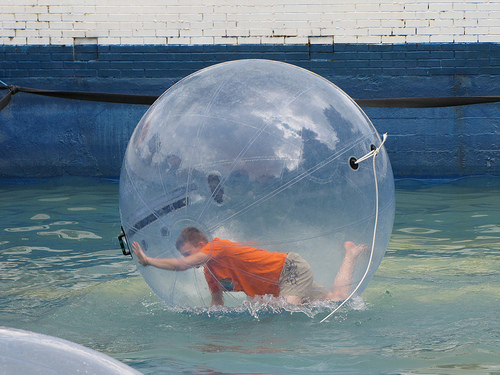

In [67]:
filename = r"C:\Users\KRIDAY PARMAR\Flickr\flickr30k_images\4868582683.jpg" #enter the file address of the image
print(get_image_caption(filename,modelx))
display(Image(filename))